# Rising adiabatic parcel: activation and growth of individual cloud droplets


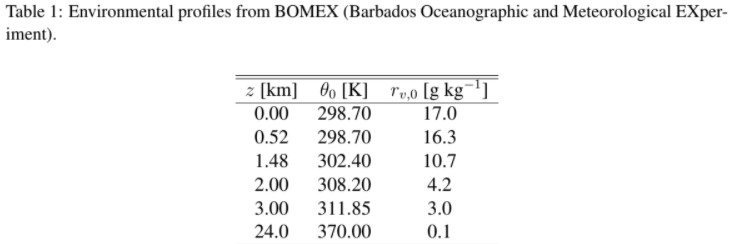

By Using the profiles of θ and rv given in table 1 we determine the pressure profile p(z) by integrating the equation for pressure obtained under the assumption of hydrostatic balance

Task. The task is to determine θ(z), rv(z), r`(z) inside an adiabatic rising parcel, at a given
position z.

In [395]:
import matplotlib.pyplot as plt
import numpy as np

Declaring the constant needed for the computation

In [396]:
Rd=287 # Dry air gas constant
Cpd=1004 #Specific heat of dry air
k=Rd/Cpd # Isentropic exponent
g=9.8 # gravitational acceleration
Rv=461.5 # gas constant for vapour
Lv=2.5*1e6 #Latent heat
epsilon=0.622 #Radio of vapor and dry air gas constants 

User defined functions are declared below to make varius calculation of the computational work 

In [397]:
#exner function used to convert potential temperature into a normal temperature
def Exner_fun(P): 
    PR =100000
    return(P/PR)**(Rd/Cpd)

# differntiated saturation vapour mixing ratio with respect to temperature
def drvs_dT(T,P): 
    Rd=287.058
    Rv=461.5
    return (Lv/(Rv*T**2))*rvs(P,T)*(1+(rvs(P,T)/epsilon))

# derivative of temperature with respect to element of condensate
def dT_ddelta(P2,P1): 
    return Lv/Cpd*Exner_fun(P2)/Exner_fun(P1)

# Linear interpolation functions
def linear_interpolation(x,x1,x2,y1,y2): 
    m=(y2-y1)/(x2-x1)
    c=y1
    y=m*x+c
    return y

# theta(z)=(theta)*(1+0.61rv) #virtual potential temperature profile funtion
def theta_v(z,z1,z2,theta1,theta2,rv1,rv2):
    theta= linear_interpolation(z,z1,z2,theta1,theta2) 
    rv= 1+0.61*linear_interpolation(z,z1,z2,rv1,rv2)
    return theta*rv
#Environmental pressure profile calculating function
def fun_environmentalpressure(z1,z2,theta1,theta2,rv1,rv2,p0,n): 
    z_var1=np.linspace(z1,z2,n)
    z_var1[0]=z1
    p_520=np.zeros_like(z_var1)
    p_520[0]=p0
    PR=100000
    f1=lambda z:PR**k*(g/Cpd)*1/theta_v(z,z1,z2,theta1,theta2,rv1,rv2)
    h = float(z2-z1)/n#h=5.2 meters
    result = 0.5*f1(z1) + 0.5*f1(z2)
    for i in range(1, n):
        result += f1(z1 + i*h)
        j=h*result
        p_520[i]=(p_520[0]**k-j)**(1/k)
        z_var1[i]=z_var1[0]+i*h
    plt.plot(p_520,z_var1)
    return p_520

# for environmental potential temperature profile which interpolates between points
def theta0_plot(z1,z2,theta1,theta2,n): 
    z=np.linspace(z1,z2,n)
    theta=np.zeros_like(z)
    h=float((z2-z1)/n)
    for i in range(0,n):
        theta[i]=linear_interpolation(i*h,z1,z2,theta1,theta2)
    plt.plot(theta,z)
    plt.xlabel("\u03B8o(K)")
    plt.ylabel("Altitude(m)")
    return theta

# for environmental temperature profile which interpolates between points
def T0_environmental_profile(z1,z2,theta1,theta2,p1,p2,n):
    z_var=np.linspace(z1,z2,n)
    T_0=np.zeros_like(z_var)
    h=(z2-z1)/n
    for i in range(0,n):
        T_0[i]= linear_interpolation(i*h,z1,z2,theta1,theta2)*(linear_interpolation(i*h,z1,z2,p1,p2)/100000)**k
    plt.plot( T_0,z_var)
    plt.grid()
    plt.xlabel("\u03B80[K]")
    plt.ylabel("Altitude(m)")
    return T_0

#for environmental vapour mixing ration profile which interpolates between points
def rv_plot(z1,z2,rv1,rv2,n): 
    z=np.linspace(z1,z2,n)
    rv=np.zeros_like(z)
    h=float((z2-z1)/n)
    for i in range(0,n):
        rv[i]=linear_interpolation(i*h,z1,z2,rv1,rv2)
    plt.plot(rv*1000,z)
    plt.xlabel("rv(g/Kg)")
    plt.ylabel("Altitude(m)")
    return rv

#from environmental potential temperature  ration profile which interpolates between points
def fun_theta_v_profile(z1,z2,theta1,theta2,rv1,rv2,n):# theta(z)=(theta)*(1+0.61rv)
    z_var1=np.linspace(z1,z2,n)
    z_var1[0]=z1
    T_v=np.zeros_like(z_var1)
    h = float(z2-z1)/n #h=5.2 meters
    for i in range(0, n):
        T_v[i]=theta_v(i*h,z1,z2,theta1,theta2,rv1,rv2)    
    plt.plot( T_v,z_var1)
    plt.grid()
    plt.xlabel("\u03B8v[K]")
    plt.ylabel("Altitude(m)")
    return T_v

From Tabel 1.

In [398]:
#Table data within an array
rv=np.array([17/1000,16.3/1000,10.7/1000,4.2/1000,3.0/1000,0.1/1000],dtype='f')
z=np.array([0.0,520,1480,2000,3000,24000],dtype='f')
theta=np.array([298.7,298.7,302.40,308.20,311.80,370.00],dtype='f')

1. Calculating the pressure porfile

Text(0, 0.5, 'Altitude(m)')

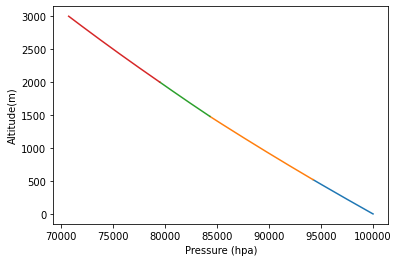

In [399]:
pvar1=fun_environmentalpressure(z[0],z[1],theta[0],theta[1],rv[0],rv[1],100000,1000)
pvar2=fun_environmentalpressure(z[1],z[2],theta[1],theta[2],rv[1],rv[2],pvar1[999],1000)
pvar3=fun_environmentalpressure(z[2],z[3],theta[2],theta[3],rv[2],rv[3],pvar2[999],1000)
pvar4=fun_environmentalpressure(z[3],z[4],theta[3],theta[4],rv[3],rv[4],pvar3[999],1000)
p=(pvar1,pvar2,pvar3,pvar4)
pvar=np.append(pvar1,pvar2)
pvar=np.append(pvar,pvar3)
pvar=np.append(pvar,pvar4)
plt.xlabel("Pressure (hpa)")
plt.ylabel("Altitude(m)")

2. Virtual Potential Temperature profile

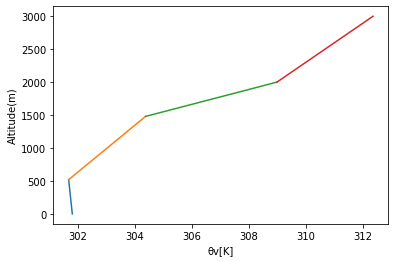

In [400]:
theta_v1=fun_theta_v_profile(z[0],z[1],theta[0],theta[1],rv[0],rv[1],1000)
theta_v2=fun_theta_v_profile(z[1],z[2],theta[1],theta[2],rv[1],rv[2],1000)
theta_v3=fun_theta_v_profile(z[2],z[3],theta[2],theta[3],rv[2],rv[3],1000)
theta_v4=fun_theta_v_profile(z[3],z[4],theta[3],theta[4],rv[3],rv[4],1000)
theta_v_=np.append(theta_v1,theta_v2)
theta_v_=np.append(theta_v_,theta_v3)
theta_v_=np.append(theta_v_,theta_v4)

3. Environmental Potential Temperature profile

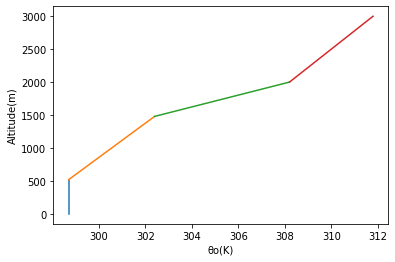

In [401]:
theta_var1=theta0_plot(z[0],z[1],theta[0],theta[1],1000)
theta_var2=theta0_plot(z[1],z[2],theta[1],theta[2],1000)
theta_var3=theta0_plot(z[2],z[3],theta[2],theta[3],1000)
theta_var4=theta0_plot(z[3],z[4],theta[3],theta[4],1000)
theta_var=np.append(theta_var1,theta_var2)
theta_var=np.append(theta_var,theta_var3)
theta_var=np.append(theta_var,theta_var4)

4.Environmental Temperature profile

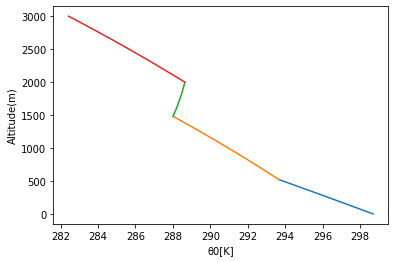

In [402]:
T_var1=T0_environmental_profile(z[0],z[1],theta[0],theta[1],pvar1[0],pvar1[999],1000)
T_var2=T0_environmental_profile(z[1],z[2],theta[1],theta[2],pvar2[0],pvar2[999],1000)
T_var3=T0_environmental_profile(z[2],z[3],theta[2],theta[3],pvar3[0],pvar3[999],1000)
T_var4=T0_environmental_profile(z[3],z[4],theta[3],theta[4],pvar4[0],pvar4[999],1000)
T_var=np.append(T_var1,T_var2)
T_var=np.append(T_var,T_var3)
T_var=np.append(T_var,T_var4)

5. Environmental Vapour mixing ratio profile

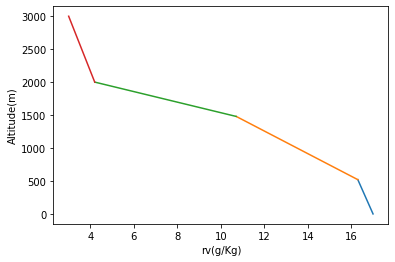

In [403]:
rv_var1=rv_plot(z[0],z[1],rv[0],rv[1],1000)
rv_var2=rv_plot(z[1],z[2],rv[1],rv[2],1000)
rv_var3=rv_plot(z[2],z[3],rv[2],rv[3],1000)
rv_var4=rv_plot(z[3],z[4],rv[3],rv[4],1000)
rv_var=np.append(rv_var1,rv_var2)
rv_var=np.append(rv_var,rv_var3)
rv_var=np.append(rv_var,rv_var4)

6.Altitude vector range from Z0=0 meters to Z=3000 meters

In [404]:
z_var1=np.linspace(z[0],z[1],1000)
z_var2=np.linspace(z[1],z[2],1000)
z_var3=np.linspace(z[2],z[3],1000)
z_var4=np.linspace(z[3],z[4],1000)
z_var=np.append(z_var1,z_var2)
z_var=np.append(z_var,z_var3)
z_var=np.append(z_var,z_var4)

7.Below is a function with a scheme of newton raphson method which calculates the amount of condensate above condensation level

In [405]:
def NewtonsMethod(x,f,g,tolerance):
    while True:
        x1 = x - f(x) / g(x) 
        t = abs(x1 - x)
        if t < tolerance:
            break
        x = x1
        return x


8. Function to calculate  saturation vapour pressure as a function of temperature and saturation vapour mixing ration with
respect to temperature and pressure at level

In [406]:
def es(T):
    e0=6.11*10**2
    T0=273.15
    return e0*np.exp((-Lv/Rv)*((1/T)-(1/T0)))

def rvs(T,P):
    epsilon=0.622
    return epsilon*es(T)/(P-es(T))

9. Intial condition:
<ol>
<li>Initial potential temperature(theta)=298.7K.
<li>Initial parcel temperature(T0) = Initial potential temperature
<li>liquid water mixing ratio "rl(g/kg)"=0.0
<li>vapour mixing ratio "rv(g/kg)"= initial value from profile=17(g/Kg)

In [407]:
from scipy import optimize
theta_n=np.arange(4000,dtype='f')
theta_n[0]=theta_var[0]
T=np.zeros_like(theta_n,dtype='f')
T[0]=theta_n[0]
rl=np.zeros_like(T,dtype='f')
rv_bulk=np.zeros_like(T,dtype='f')+rv_var[0]

10.Runing the codes developed with the mathematical model

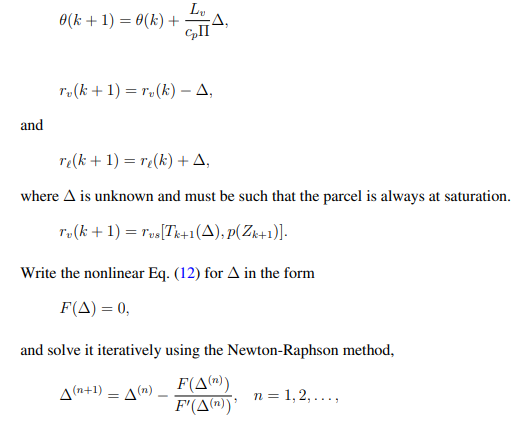

In [408]:
delta=0.0
b=0.017
for i in range(0,3999):
    theta_n[i+1]=theta_n[i]+(1/Exner_fun(pvar[i-1]))*Lv/Cpd*delta
    T[i+1]=theta_n[i]*Exner_fun(pvar[i+1])+Exner_fun(pvar[i])/Exner_fun(pvar[i-1])*(Lv/Cpd)*delta
    rv_s=rvs(T[i+1],pvar[i+1])
    b=b-delta
    rv_r=b
    rv_bulk[i+1]=rv_bulk[i]-delta
    rl[i+1]=rl[i]+delta
    f=lambda delta:rv_s-rv_r+delta
    g=lambda delta:drvs_dT(T[i+1],pvar[i+1])*dT_ddelta(pvar[i+1],pvar[i])+1
    delta=0
    if rv_s<=rv_r:
        delta=NewtonsMethod(delta,f,g,0.00000000001)
        #print(i)
        #delta=optimize.newton(f,delta,g)

11. Plotting the Bulk Potential Temperature profile

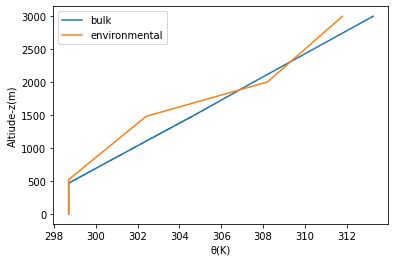

In [409]:
plt.plot(theta_n,z_var,label="bulk")
plt.plot(theta_var,z_var,label="environmental")
plt.xlabel("\u03B8(K)")
plt.ylabel("Altiude-z(m)")
plt.legend()
plt.show()

12. Plotting the Bulk liquid water mixing ratio profile 'rl(z)'

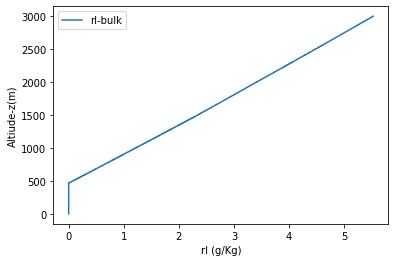

In [410]:
plt.plot(rl*1000,z_var,label="rl-bulk")
plt.xlabel("rl (g/Kg)")
plt.ylabel("Altiude-z(m)")
plt.legend()
plt.show()

13.Plotting the Bulk Vapor mixing ratio 'rv(z)'

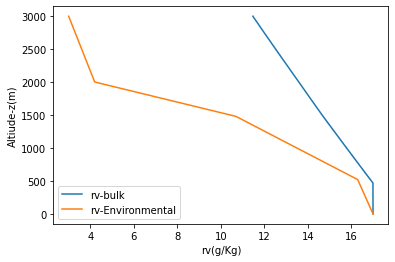

In [411]:
plt.plot(rv_bulk*1000,z_var,label="rv-bulk")
plt.plot(rv_var*1000,z_var,label="rv-Environmental")
plt.xlabel("rv(g/Kg)")
plt.ylabel("Altiude-z(m)")
plt.legend()
plt.show()